In [2]:
%load_ext autoreload
%autoreload 1
%matplotlib inline


In [3]:
import numpy as np
import pandas as pd
import matplotlib, collections, itertools, os, re, textwrap, logging
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from functools import reduce

from logging.config import dictConfig
from logging import getLogger

dictConfig(dict(
    version = 1,
    formatters = {'f': {'format': '%(asctime)s %(name)-12s %(levelname)-8s %(message)s'}},
    handlers = {
        'h': {'class': 'logging.StreamHandler','formatter': 'f',
              'level': logging.DEBUG}},
    root = {'handlers': ['h'], 'level': logging.DEBUG,},
))

matplotlib.rc('font',**{'size':16, 'family':'sans-serif','sans-serif':['HelveticaNeue', 'Helvetica']})

logger = getLogger('notebook')


In [4]:
import yt_misc_py as yt_misc

import rivas_decomposition_py as decomposition


In [5]:
repo_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath(os.getcwd()))))

out_dir = os.path.join(
    repo_dir, 'figs', os.path.basename(os.path.realpath(os.getcwd())),
)


In [6]:
# d_PTVs = decomposition.decomposition(os.path.join(
#     repo_dir, 'private_data', 'npz', 'dev_PTVsNonMHC_z_center_p0001_100PCs_20180129.npz'
# ))

# d_coding = decomposition.decomposition(os.path.join(
#     repo_dir, 'private_data', 'npz', 'dev_codingNonMHC_z_center_p0001_100PCs_20180129.npz'
# ))

d_all = decomposition.decomposition(os.path.join(
    repo_dir, 'private_data', 'npz', 'dev_allNonMHC_z_center_p0001_100PCs_20180129.npz'
))


2018-05-16 11:30:25,114 data_load_from_npz INFO     reading data from /Users/yosuke/repos/rivas-lab/decomposition/private_data/npz/dev_allNonMHC_z_center_p0001_100PCs_20180129.npz


In [7]:
labels_dict = {
    'Body mass index (BMI)': 'BMI',
    'heart attack/myocardial infarction': 'MI', 
    'cholelithiasis/gall stones': 'Gallstones',     
}


In [8]:
labels_dict_BMI = {
    'Body mass index (BMI)': 'BMI'
}
labels_dict_MI_gallstones = {
    'heart attack/myocardial infarction': 'MI', 
    'cholelithiasis/gall stones': 'Gallstones',     
}


In [9]:
labels_dict_BMI = {
    'Body mass index (BMI)': 'BMI'
}
labels_dict_MI = {
    'heart attack/myocardial infarction': 'MI', 
}
labels_dict_gallstones = {
    'cholelithiasis/gall stones': 'Gallstones',     
}


In [10]:
phe_gs = decomposition.Phe_label_groups(d_all.d['label_phe'])
phe_gs.add('fat-free')
phe_gs.add('fat', 'fat\s')
phe_gs.add('impedance')
phe_gs.add('reticulocyte')
phe_gs.add('meridian')
phe_gs.add('spirometry', r'fvc|fev1|pef')


2018-05-15 13:46:35,303 plot_contribution DEBUG    /Users/yosuke/repos/rivas-lab/decomposition/figs/Fig3_AllVariants/fig3A_legend_BMI_1_PC2
2018-05-15 13:46:36,176 plot_contribution INFO     fat: 0.6150; spirometry: 0.0470; fat-free: 0.0325; impedance: 0.0092; reticulocyte: 0.0021; meridian: 0.0007
2018-05-15 13:46:36,253 plot_contribution DEBUG    BMI	Body mass index (BMI)
2018-05-15 13:46:36,255 plot_contribution DEBUG    Trunk pred. mass	Trunk predicted mass
2018-05-15 13:46:36,258 plot_contribution DEBUG    Others	others
2018-05-15 13:46:36,260 plot_contribution INFO     saving to /Users/yosuke/repos/rivas-lab/decomposition/figs/Fig3_AllVariants/fig3A_legend_BMI_1_PC2.png
2018-05-15 13:46:37,133 plot_contribution INFO     saving to /Users/yosuke/repos/rivas-lab/decomposition/figs/Fig3_AllVariants/fig3A_legend_BMI_1_PC2.pdf
2018-05-15 13:46:37,893 plot_contribution DEBUG    /Users/yosuke/repos/rivas-lab/decomposition/figs/Fig3_AllVariants/fig3A_legend_BMI_2_PC1
2018-05-15 13:46:38,0

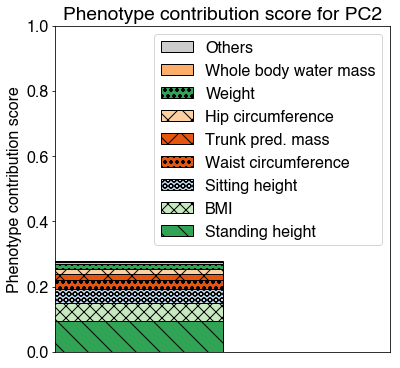

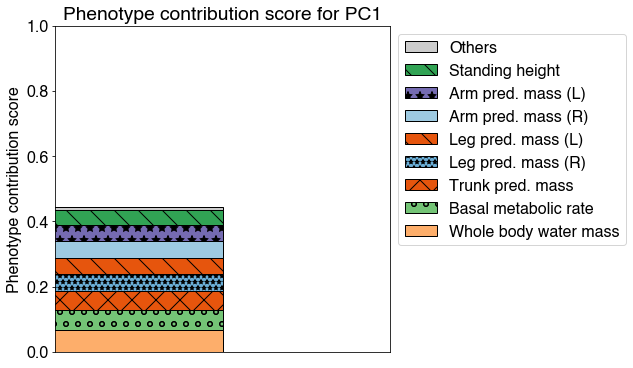

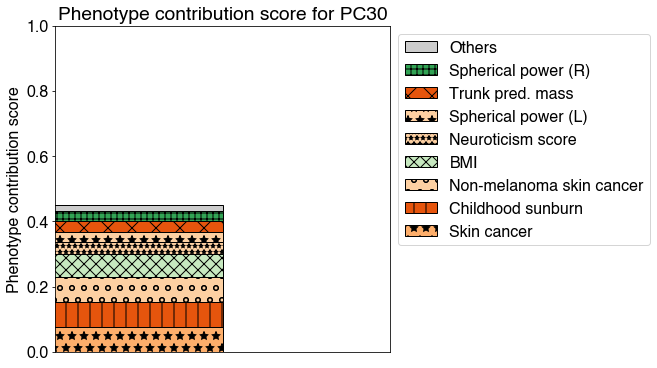

In [9]:
decomposition.plot_contribution_legend_phe_batch_fig(
    labels_dict_BMI, 
    out_dir, 
    fig_title = 'fig3A', 
    d = d_all, 
    topk = 3, 
    phe_gs=phe_gs,
    topk_in_pc=8,
)

2018-05-15 13:47:02,632 plot_contribution DEBUG    /Users/yosuke/repos/rivas-lab/decomposition/figs/Fig3_AllVariants/fig3A_legend_MI_1_PC22
2018-05-15 13:47:02,950 plot_contribution DEBUG    High cholesterol	high cholesterol
2018-05-15 13:47:02,952 plot_contribution DEBUG    Simvastatin	simvastatin
2018-05-15 13:47:02,957 plot_contribution DEBUG    Systolic BP (AR)	Systolic blood pressure, automated reading
2018-05-15 13:47:02,963 plot_contribution DEBUG    Atorvastatin	atorvastatin
2018-05-15 13:47:02,970 plot_contribution DEBUG    Diastolic BP (AR)	Diastolic blood pressure, automated reading
2018-05-15 13:47:02,983 plot_contribution DEBUG    Pulse rate (AR)	Pulse rate, automated reading
2018-05-15 13:47:02,985 plot_contribution DEBUG    Impedance of arm (L)	Impedance of arm (left)
2018-05-15 13:47:02,989 plot_contribution DEBUG    Alzheimer's/dementia	Alzheimer's disease/dementia
2018-05-15 13:47:02,993 plot_contribution DEBUG    Others	others
2018-05-15 13:47:02,999 plot_contributio

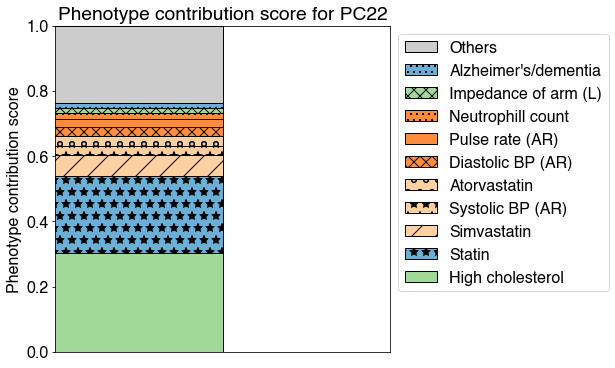

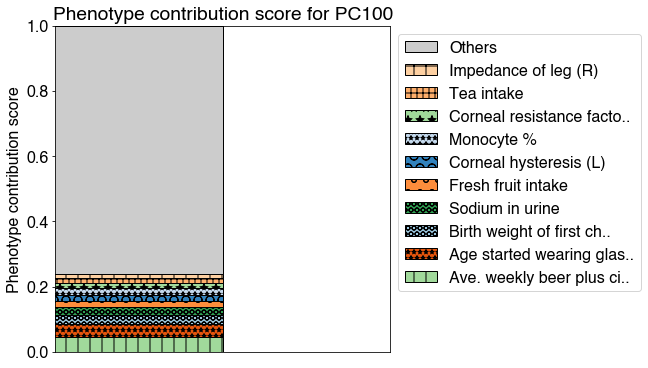

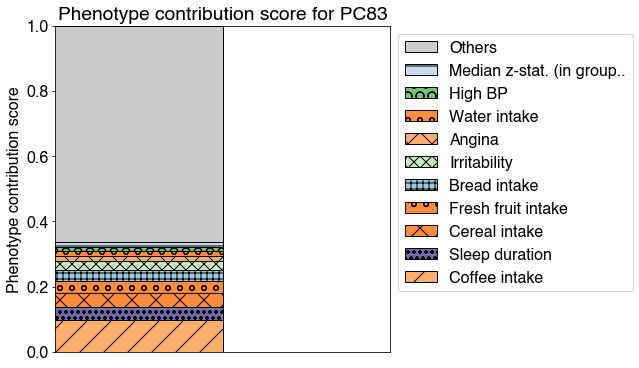

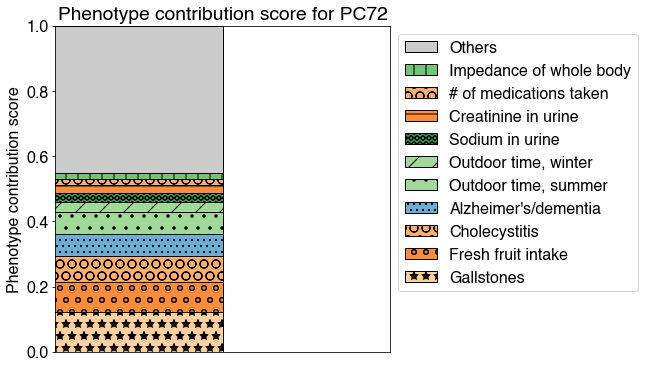

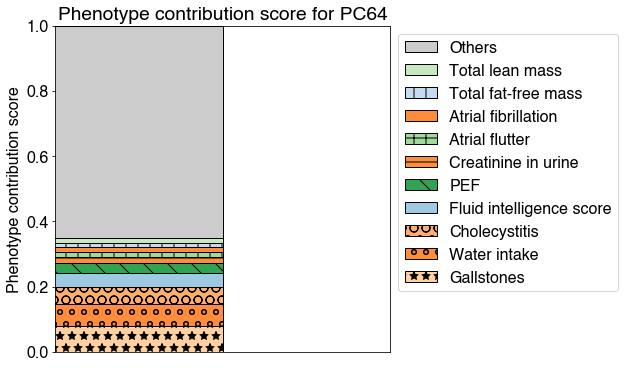

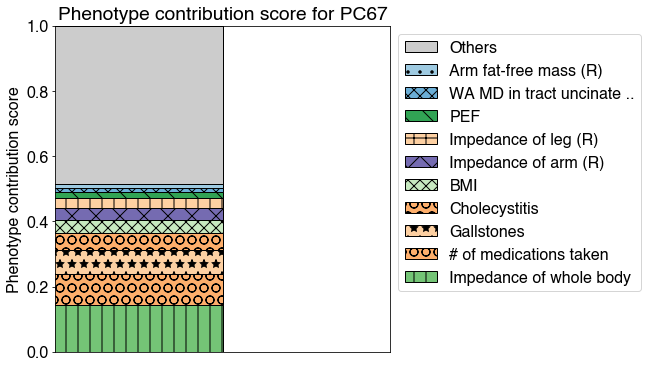

In [10]:
decomposition.plot_contribution_legend_phe_batch_fig(
    labels_dict_MI_gallstones, 
    out_dir, 
    fig_title = 'fig3A', 
    d = d_all, 
    topk = 3, 
    topk_in_pc=10,
)

2018-05-16 11:38:50,200 plot_contribution INFO     fat: 0.6150; spirometry: 0.0464; fat-free: 0.0251
2018-05-16 11:38:50,295 plot_contribution INFO     fat-free: 0.3270; fat: 0.0624; impedance: 0.0459; spirometry: 0.0051
2018-05-16 11:38:50,442 plot_contribution INFO     fat: 0.2870; fat-free: 0.0682
2018-05-16 11:38:50,563 root         INFO     /Users/yosuke/repos/rivas-lab/decomposition/figs/Fig3_AllVariants/fig3A_BMI.pdf
2018-05-16 11:38:51,894 root         INFO     /Users/yosuke/repos/rivas-lab/decomposition/figs/Fig3_AllVariants/fig3A_BMI.png


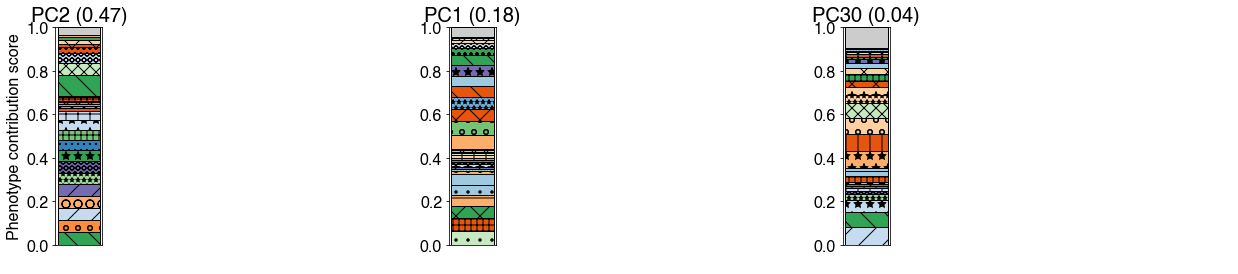

In [22]:
decomposition.plot_contribution_and_save(
    d = d_all, 
    phe_or_gene = 'phe', 
    labels = labels_dict_BMI.keys(), 
    topk = 3, 
    out_dir = out_dir, 
    fig_title = 'fig3A_BMI', 
    fig_spacing = 7, 
    contribution_thr=0.005, 
    pc_y_max = 1, 
    figsize=(21,4),
    phe_gs=phe_gs
)


2018-05-16 11:38:59,962 root         INFO     /Users/yosuke/repos/rivas-lab/decomposition/figs/Fig3_AllVariants/fig3A_MI.pdf
2018-05-16 11:39:01,662 root         INFO     /Users/yosuke/repos/rivas-lab/decomposition/figs/Fig3_AllVariants/fig3A_MI.png


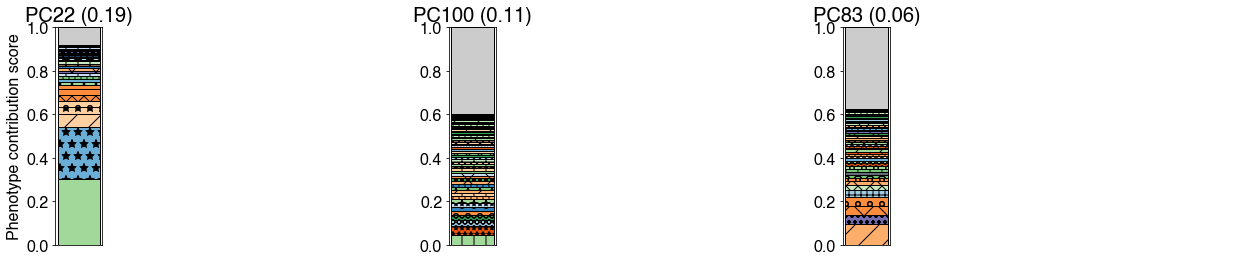

In [23]:
decomposition.plot_contribution_and_save(
    d = d_all, 
    phe_or_gene = 'phe', 
    labels = labels_dict_MI.keys(), 
    topk = 3, 
    out_dir = out_dir, 
    fig_title = 'fig3A_MI', 
    fig_spacing = 7, 
    contribution_thr=0.005, 
    pc_y_max = 1, 
    figsize=(21,4),
)


2018-05-16 11:39:06,262 root         INFO     /Users/yosuke/repos/rivas-lab/decomposition/figs/Fig3_AllVariants/fig3A_gallstones.pdf
2018-05-16 11:39:07,116 root         INFO     /Users/yosuke/repos/rivas-lab/decomposition/figs/Fig3_AllVariants/fig3A_gallstones.png


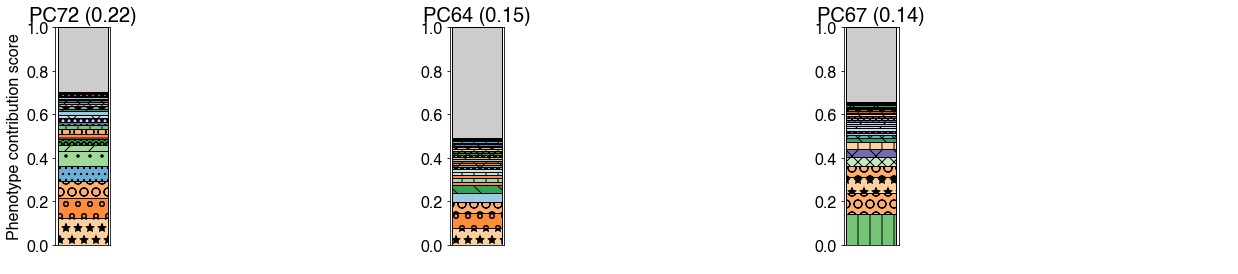

In [24]:
decomposition.plot_contribution_and_save(
    d = d_all, 
    phe_or_gene = 'phe', 
    labels = labels_dict_gallstones.keys(), 
    topk = 3, 
    out_dir = out_dir, 
    fig_title = 'fig3A_gallstones', 
    fig_spacing = 6, 
    contribution_thr=0.005, 
    pc_y_max = 1, 
    figsize=(21,4),
)


2018-05-15 13:49:04,523 plot_contribution INFO     fat: 0.6150; spirometry: 0.0464; fat-free: 0.0251
2018-05-15 13:49:04,711 plot_contribution INFO     fat-free: 0.3270; fat: 0.0624; impedance: 0.0459; spirometry: 0.0051
2018-05-15 13:49:04,948 plot_contribution INFO     fat: 0.2870; fat-free: 0.0682
2018-05-15 13:49:05,129 root         INFO     /Users/yosuke/repos/rivas-lab/decomposition/figs/Fig3_AllVariants/fig3A_BMI.pdf
2018-05-15 13:49:07,033 root         INFO     /Users/yosuke/repos/rivas-lab/decomposition/figs/Fig3_AllVariants/fig3A_BMI.png


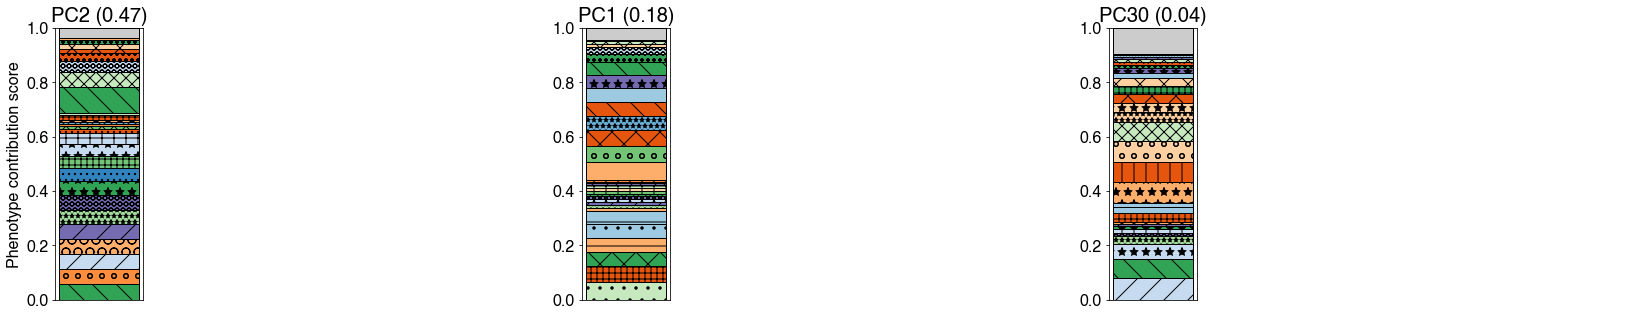

In [12]:
decomposition.plot_contribution_and_save(
    d = d_all, 
    phe_or_gene = 'phe', 
    labels = labels_dict_BMI.keys(), 
    topk = 3, 
    out_dir = out_dir, 
    fig_title = 'fig3A_BMI', 
    fig_spacing = 5, 
    contribution_thr=0.005, 
    pc_y_max = 1, 
    figsize=(28,5),
    phe_gs=phe_gs
)


2018-05-15 13:49:20,868 root         INFO     /Users/yosuke/repos/rivas-lab/decomposition/figs/Fig3_AllVariants/fig3A_MI_gallstones.pdf
2018-05-15 13:49:24,535 root         INFO     /Users/yosuke/repos/rivas-lab/decomposition/figs/Fig3_AllVariants/fig3A_MI_gallstones.png


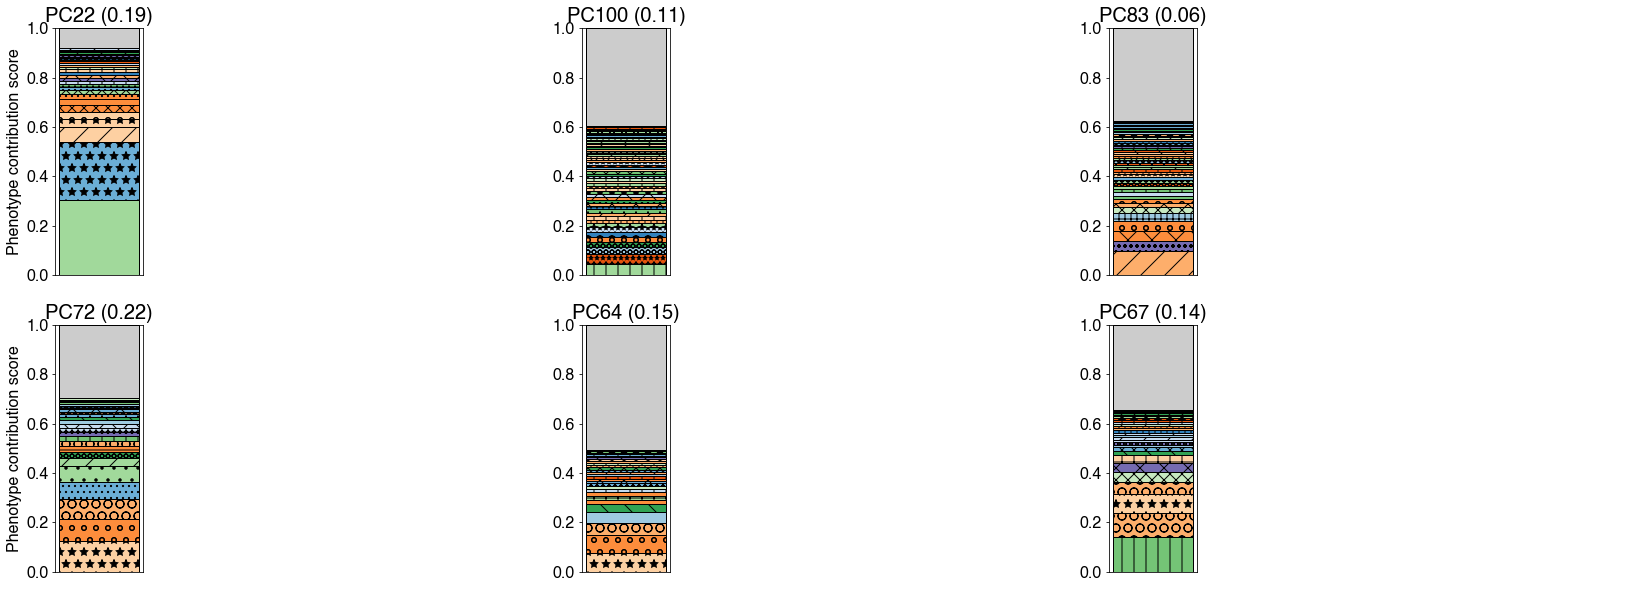

In [13]:
decomposition.plot_contribution_and_save(
    d = d_all, 
    phe_or_gene = 'phe', 
    labels = labels_dict_MI_gallstones.keys(), 
    topk = 3, 
    out_dir = out_dir, 
    fig_title = 'fig3A_MI_gallstones', 
    fig_spacing = 5, 
    contribution_thr=0.005, 
    pc_y_max = 1, 
    figsize=(28,10),
)
